<h1>Capstone Project 20.1: Initial Report and Exploratory Data Analysis (EDA)</h1>

<h3>Introduction</h3>
<p>
    The project is intended to help Electric vehicle manufacturers to estimate their EPA ranges during design phase by calibrating different variables that impact the range like, Battery size, curb weight, drag coefficient from body design, drivetrain etc.
    This project will enable car manufacturers to refine and update their designs and specs as they are still in the early stages to target the intended market.
</p>

<h3>Importing libraries</h3>

In [41]:
# Import necessary libraries for data analysis, preprocessing, model training, and evaluation.
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import time
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import UndefinedMetricWarning
import warnings
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

<h3>Reading the data</h3>

In [42]:
# Load the Vehicle dataset into a pandas DataFrame.
EV = pd.read_csv('vehicles.csv')

In [43]:
EV.head()

,Model Year,Manufacturer,Model,Curb Weight,Drag Coeffiecents,Category,Fuel,Seats,Alternative Fuel Economy City,Alternative Fuel Economy Highway,...,Battery Capacity (kWh),Transmission Type,Transmission Make,Engine Type,Engine Size,Engine Cylinder Count,Number of Passengers,Heavy-Duty Power System,Drivetrain,Notes
0,2025,Audi,Q4 45 e-tron,4630,0.28,SUV,Electric,5,125.0,104.0,...,81.6,NaN,NaN,e-motor,210 kW,NaN,NaN,NaN,RWD,NaN
1,2025,Audi,Q6 e-tron quattro,5300,0.27,SUV,Electric,NaN,NaN,NaN,...,100.0,NaN,NaN,e-motor,140 and 280 kW,NaN,NaN,NaN,AWD,NaN
2,2025,Audi,Q8 e-tron quattro,5700,0.28,SUV,Electric,5,NaN,NaN,...,114.3,NaN,NaN,e-motor,141 and 172 kW,NaN,NaN,NaN,AWD,NaN
3,2025,Audi,Q8 Sportback e-tron quattro,5650,0.26,SUV,Electric,5,NaN,NaN,...,114.3,NaN,NaN,e-motor,141 and 172 kW,NaN,NaN,NaN,AWD,NaN
4,2025,Audi,SQ6 e-tron,5400,0.27,SUV,Electric,NaN,96.0,82.0,...,100.0,NaN,NaN,e-motor,140 kW (x2),NaN,NaN,NaN,AWD,NaN


In [44]:
EV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 32 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Model Year                                           291 non-null    int64  
 1   Manufacturer                                         291 non-null    object 
 2   Model                                                291 non-null    object 
 3   Curb Weight                                          291 non-null    int64  
 4   Drag Coeffiecents                                    291 non-null    float64
 5   Category                                             291 non-null    object 
 6   Fuel                                                 291 non-null    object 
 7   Seats                                                234 non-null    object 
 8   Alternative Fuel Economy City                        143 non-null    f

In [45]:
# Count and handle the missing values 
na_counts = EV.isna().sum()
na_counts_filtered = na_counts[na_counts > 0]
na_counts_filtered

Seats                                                   57
Alternative Fuel Economy City                          148
Alternative Fuel Economy Highway                       148
Conventional Fuel Economy City                         291
Conventional Fuel Economy Highway                      291
Conventional Fuel Economy Combined                     291
PHEV Type                                              291
Total Range                                            291
Charging Rate Level 2 (kW)                              55
Charging Rate DC Fast (kW)                              56
Charging Speed Level 1 (miles per hour of charging)     54
Charging Speed Level 2 (miles per hour of charging)     54
Charging Speed DC Fast (miles per hour of charging)     54
Transmission Type                                      291
Transmission Make                                      291
Engine Cylinder Count                                  291
Number of Passengers                                   2

In [46]:
# Create a group of columns that can be dropped
columns_to_drop = [
    "Fuel", "Seats", "Alternative Fuel Economy City", "Alternative Fuel Economy Highway",
    "Alternative Fuel Economy Combined", "Conventional Fuel Economy City",
    "Conventional Fuel Economy Highway", "Conventional Fuel Economy Combined", "PHEV Type",
    "Total Range", "Charging Rate Level 2 (kW)", "Charging Rate DC Fast (kW)",
    "Charging Speed Level 1 (miles per hour of charging)", 
    "Charging Speed Level 2 (miles per hour of charging)", 
    "Charging Speed DC Fast (miles per hour of charging)", "Category", 
    "Transmission Type", "Transmission Make", "Engine Type", "Engine Size", 
    "Engine Cylinder Count", "Number of Passengers", "Heavy-Duty Power System", "Notes"
]

EV = EV.drop(columns=columns_to_drop)

# Display the updated DataFrame
EV.head()

,Model Year,Manufacturer,Model,Curb Weight,Drag Coeffiecents,All-Electric Range,Battery Capacity (kWh),Drivetrain
0,2025,Audi,Q4 45 e-tron,4630,0.28,288,81.6,RWD
1,2025,Audi,Q6 e-tron quattro,5300,0.27,295-307,100.0,AWD
2,2025,Audi,Q8 e-tron quattro,5700,0.28,254-272,114.3,AWD
3,2025,Audi,Q8 Sportback e-tron quattro,5650,0.26,254-272,114.3,AWD
4,2025,Audi,SQ6 e-tron,5400,0.27,275,100.0,AWD


In [47]:
# Remove the -'s from the column values
def calculate_avg_range(value):
    if '-' in str(value):
        # Split the range and calculate the average
        lower, upper = map(int, value.split('-'))
        return (lower + upper) / 2
    try:
        # Return the original value if it's not a range
        return float(value)
    except ValueError:
        return None

# Apply the function to the "All-Electric Range" column
EV['All-Electric Range'] = EV['All-Electric Range'].apply(calculate_avg_range)

# Display the updated DataFrame
EV.head()

,Model Year,Manufacturer,Model,Curb Weight,Drag Coeffiecents,All-Electric Range,Battery Capacity (kWh),Drivetrain
0,2025,Audi,Q4 45 e-tron,4630,0.28,288.0,81.6,RWD
1,2025,Audi,Q6 e-tron quattro,5300,0.27,301.0,100.0,AWD
2,2025,Audi,Q8 e-tron quattro,5700,0.28,263.0,114.3,AWD
3,2025,Audi,Q8 Sportback e-tron quattro,5650,0.26,263.0,114.3,AWD
4,2025,Audi,SQ6 e-tron,5400,0.27,275.0,100.0,AWD


In [48]:
EV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Model Year              291 non-null    int64  
 1   Manufacturer            291 non-null    object 
 2   Model                   291 non-null    object 
 3   Curb Weight             291 non-null    int64  
 4   Drag Coeffiecents       291 non-null    float64
 5   All-Electric Range      291 non-null    float64
 6   Battery Capacity (kWh)  291 non-null    float64
 7   Drivetrain              291 non-null    object 
dtypes: float64(3), int64(2), object(3)
memory usage: 18.3+ KB


In [49]:
# Standardize column names by replacing spaces and hyphens with underscores and converting to lowercase
EV.columns = EV.columns.str.replace(' ', '_').str.replace('-', '_').str.lower()

# Display the updated DataFrame with fully standardized column names
EV.head()

,model_year,manufacturer,model,curb_weight,drag_coeffiecents,all_electric_range,battery_capacity_(kwh),drivetrain
0,2025,Audi,Q4 45 e-tron,4630,0.28,288.0,81.6,RWD
1,2025,Audi,Q6 e-tron quattro,5300,0.27,301.0,100.0,AWD
2,2025,Audi,Q8 e-tron quattro,5700,0.28,263.0,114.3,AWD
3,2025,Audi,Q8 Sportback e-tron quattro,5650,0.26,263.0,114.3,AWD
4,2025,Audi,SQ6 e-tron,5400,0.27,275.0,100.0,AWD


Text(0, 0.5, 'All-Electric Range')

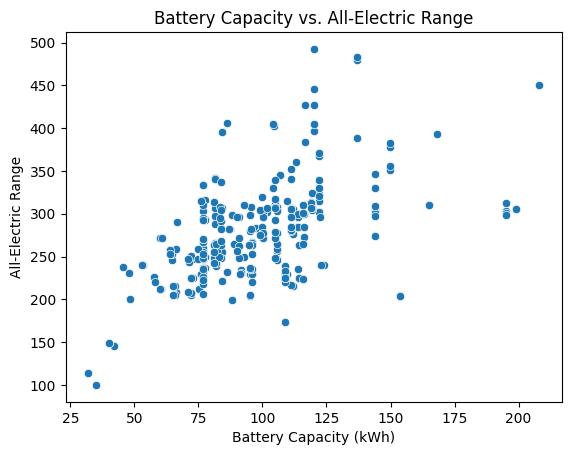

In [50]:
# Analyze how battery capacity influences the range
sns.scatterplot(x='battery_capacity_(kwh)', y='all_electric_range', data=EV)
plt.title("Battery Capacity vs. All-Electric Range")
plt.xlabel("Battery Capacity (kWh)")
plt.ylabel("All-Electric Range")

Text(0, 0.5, 'All-Electric Range')

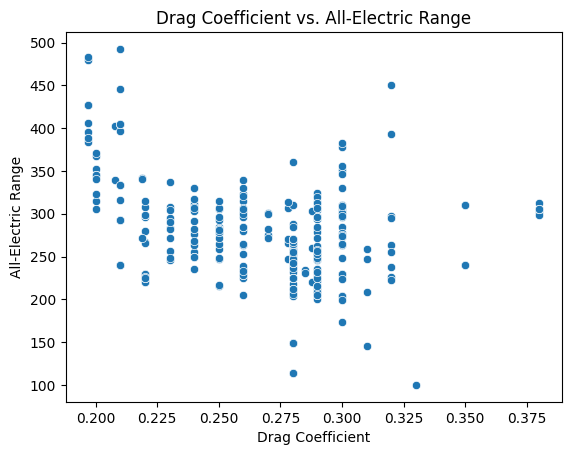

In [51]:
# Analyze if aerodynamic efficiency impacts the range
sns.scatterplot(x='drag_coeffiecents', y='all_electric_range', data=EV)
plt.title("Drag Coefficient vs. All-Electric Range")
plt.xlabel("Drag Coefficient")
plt.ylabel("All-Electric Range")

Text(0.5, 1.02, 'Pairplot of Key Features')

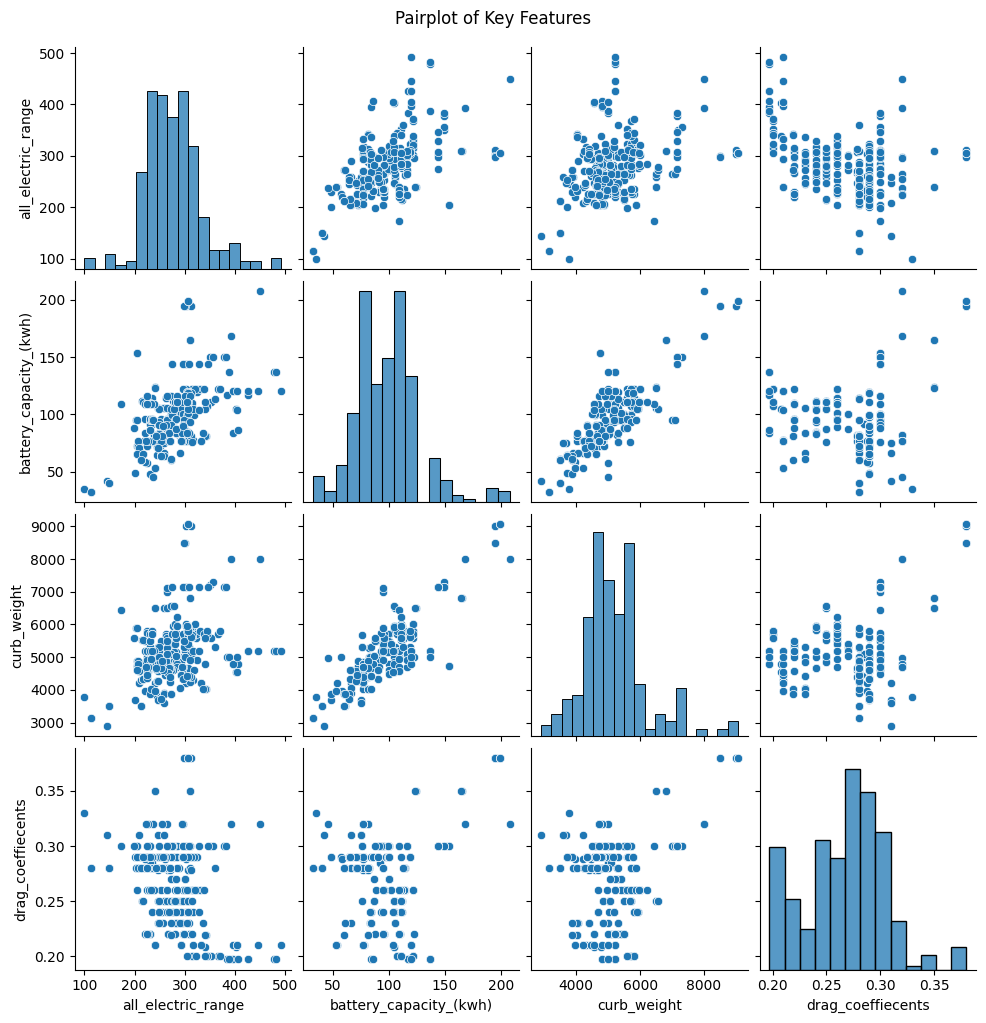

In [52]:
# Visualize pairwise relationships between key numerical features.
sns.pairplot(EV[['all_electric_range', 'battery_capacity_(kwh)', 'curb_weight', 'drag_coeffiecents']])
plt.suptitle("Pairplot of Key Features", y=1.02)

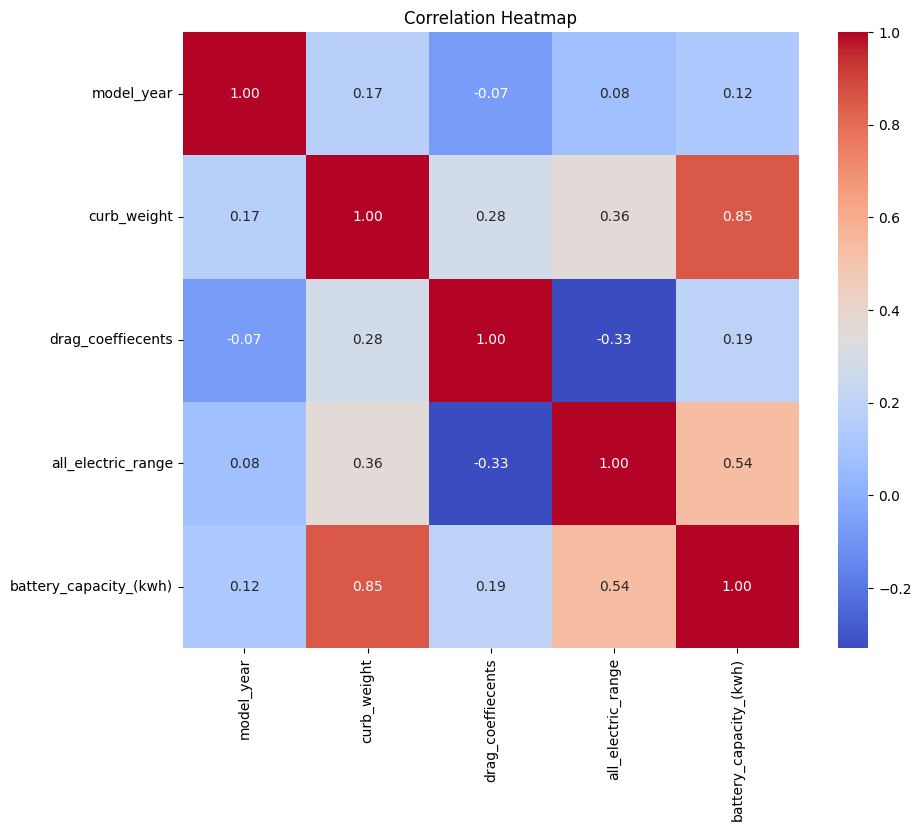

In [53]:
# Select numerical columns for the heatmap
numerical_columns = EV.select_dtypes(include=['float64', 'int64'])

# Create a correlation matrix
correlation_matrix = numerical_columns.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.show()

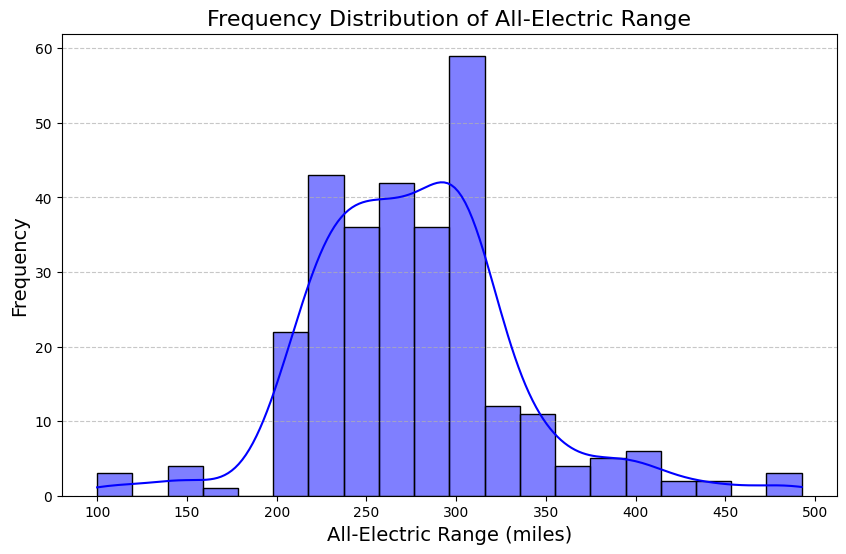

In [54]:
# Create a plot to show the frequency distribution of all_electric_range
plt.figure(figsize=(10, 6))
sns.histplot(EV['all_electric_range'], bins=20, kde=True, color='blue')
plt.title('Frequency Distribution of All-Electric Range', fontsize=16)
plt.xlabel('All-Electric Range (miles)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

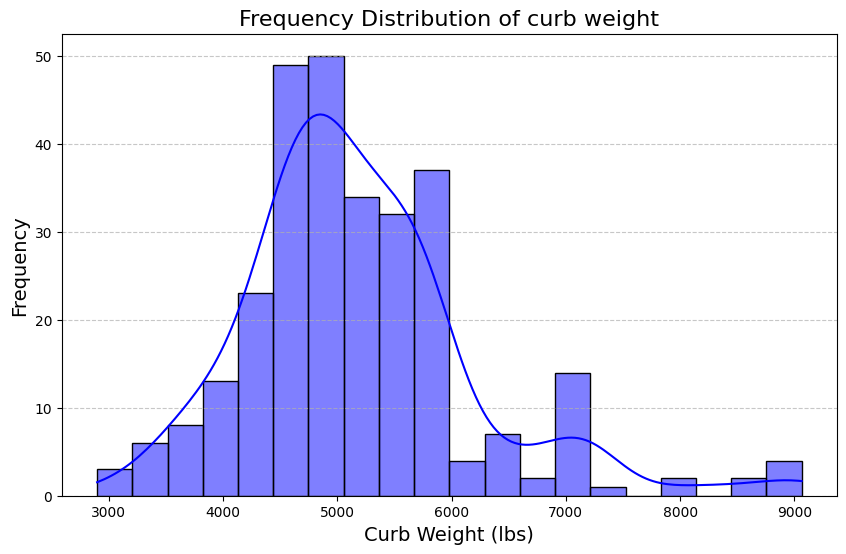

In [55]:
# Create a plot to show the frequency distribution of all_electric_range
plt.figure(figsize=(10, 6))
sns.histplot(EV['curb_weight'], bins=20, kde=True, color='blue')
plt.title('Frequency Distribution of curb weight', fontsize=16)
plt.xlabel('Curb Weight (lbs)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [56]:
# Finding the model to use for this dataset

# Set the target variable for regression
y = EV['all_electric_range']

# Splitting the dataset
X = EV.drop(columns=['all_electric_range'])

# Convert categorical columns to numerical using one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize regression models
models = {
    'Linear Regression': LinearRegression(),
    'Support Vector Regressor': SVR(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'K-Nearest Neighbors Regressor': KNeighborsRegressor()
}

# Train and evaluate models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'Mean Squared Error': mse, 'R^2 Score': r2}

# Display the results
for model_name, metrics in results.items():
    print(f"{model_name}:")
    for metric_name, metric_value in metrics.items():
        print(f"  {metric_name}: {metric_value:.4f}")
    print()

Linear Regression:
  Mean Squared Error: 840.1544
  R^2 Score: 0.7742

Support Vector Regressor:
  Mean Squared Error: 3618.8280
  R^2 Score: 0.0274

Decision Tree Regressor:
  Mean Squared Error: 529.4290
  R^2 Score: 0.8577

K-Nearest Neighbors Regressor:
  Mean Squared Error: 2459.4666
  R^2 Score: 0.3390



In [57]:
# Finding the best params for the models to see what works best

# Define parameter grids for each regressor
param_grids = {
    'Linear Regression': {},  # LinearRegression does not have hyperparameters to tune
    'Support Vector Regressor': {
        'C': [0.1, 1, 10, 100],  # Regularization strength
        'kernel': ['poly', 'rbf', 'sigmoid'],  # Kernel types
    },
    'Decision Tree Regressor': {
        'max_depth': [3, 5, 10, None],  # Maximum depth
        'min_samples_split': [2, 5, 10],  # Minimum samples to split
        'min_samples_leaf': [1, 2, 5],  # Minimum samples per leaf
        'criterion': ['squared_error', 'friedman_mse', 'absolute_error']  # Corrected criteria
    },
    'K-Nearest Neighbors Regressor': {
        'n_neighbors': [3, 5, 7, 10, 15],  # Number of neighbors
        'weights': ['uniform', 'distance'],  # Weight function
        'p': [1, 2]  # Power parameter (1: Manhattan, 2: Euclidean)
    }
}

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Support Vector Regressor': SVR(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'K-Nearest Neighbors Regressor': KNeighborsRegressor()
}

# Perform GridSearchCV for each model
best_params = {}
for model_name, model in models.items():
    print(f"Running GridSearchCV for {model_name}...")
    
    # Skip Linear Regression as it has no hyperparameters to tune
    if model_name == 'Linear Regression':
        best_params[model_name] = "No hyperparameters to tune"
        continue
    
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_params[model_name] = grid_search.best_params_
    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best Negative Mean Squared Error for {model_name}: {grid_search.best_score_:.4f}\n")

# Print all results
print("Best Parameters for All Regressors:")
print(best_params)

Running GridSearchCV for Linear Regression...
Running GridSearchCV for Support Vector Regressor...
Best Parameters for Support Vector Regressor: {'C': 100, 'kernel': 'rbf'}
Best Negative Mean Squared Error for Support Vector Regressor: -2709.9152

Running GridSearchCV for Decision Tree Regressor...
Best Parameters for Decision Tree Regressor: {'criterion': 'absolute_error', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Negative Mean Squared Error for Decision Tree Regressor: -875.8331

Running GridSearchCV for K-Nearest Neighbors Regressor...
Best Parameters for K-Nearest Neighbors Regressor: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Best Negative Mean Squared Error for K-Nearest Neighbors Regressor: -1298.8246

Best Parameters for All Regressors:
{'Linear Regression': 'No hyperparameters to tune', 'Support Vector Regressor': {'C': 100, 'kernel': 'rbf'}, 'Decision Tree Regressor': {'criterion': 'absolute_error', 'max_depth': None, 'min_samples_leaf': 1,

In [58]:
# Updating the model selection with the new best parameters for Decision Tree

# Initialize Decision Tree Regressor with specified parameters
decision_tree = DecisionTreeRegressor(
    criterion='squared_error',
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=5,
    random_state=42
)

# Train the Decision Tree Regressor
start_time = time.time()
decision_tree.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time

# Predict on the test set
y_pred = decision_tree.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print("Decision Tree Regressor:")
print(f"  Mean Squared Error: {mse:.4f}")
print(f"  Mean Absolute Error: {mae:.4f}")
print(f"  R^2 Score: {r2:.4f}")
print(f"  Training Time: {training_time:.2f} seconds")

Decision Tree Regressor:
  Mean Squared Error: 940.3535
  Mean Absolute Error: 22.2451
  R^2 Score: 0.7473
  Training Time: 0.00 seconds


Training Random Forest...
Fitting 12 folds for each of 81 candidates, totalling 972 fits
Random Forest - MAE: 17.8683, MSE: 535.6005, Training Time: 7.98 seconds
Random Forest - Best Parameters: {'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 200}
Training Bagging...
Bagging - MAE: 21.5402, MSE: 733.2026, Training Time: 1.15 seconds
Training Boosting...
Boosting - MAE: 20.5992, MSE: 665.3912, Training Time: 0.04 seconds
Feature Importances (Random Forest):
                  Feature  Importance
3  battery_capacity_(kwh)    0.371670
2       drag_coeffiecents    0.166333
1             curb_weight    0.082283
0              model_year    0.013834


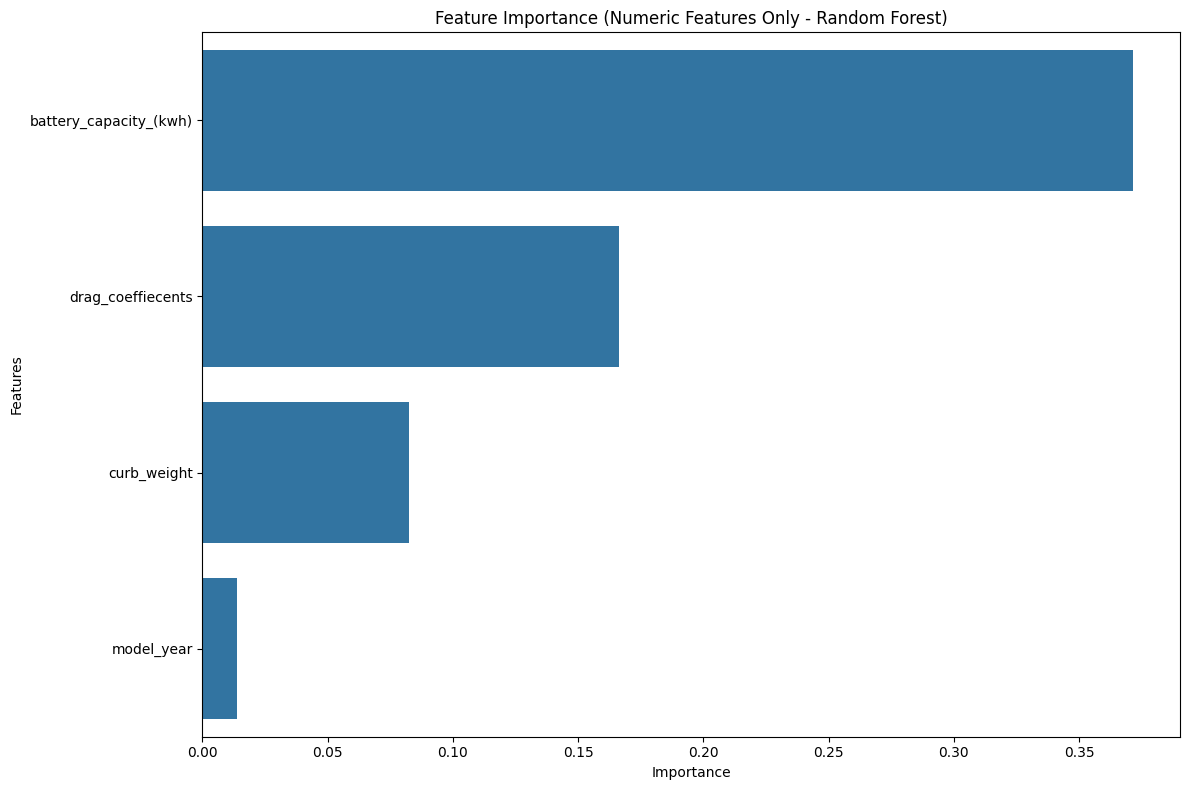

In [59]:
# Using ensemble technique, bagging and boosting to test if this would work better than Decision Tree

# Identify numeric and categorical columns
numeric_features = ["model_year", "curb_weight", "drag_coeffiecents", "battery_capacity_(kwh)"]
categorical_features = ["manufacturer", "model", "drivetrain"]

# Define preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# Define base models
random_forest = RandomForestRegressor(random_state=42)
bagging = BaggingRegressor(estimator=random_forest, n_estimators=10, random_state=42)
gb_regressor = GradientBoostingRegressor(random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define pipelines for different models
pipelines = {
    "Random Forest": Pipeline(steps=[("preprocessor", preprocessor), ("model", random_forest)]),
    "Bagging": Pipeline(steps=[("preprocessor", preprocessor), ("model", bagging)]),
    "Boosting": Pipeline(steps=[("preprocessor", preprocessor), ("model", gb_regressor)])
}

# Hyperparameter grids for Random Forest
param_grid_rf = {
    "model__n_estimators": [50, 100, 200],
    "model__max_depth": [None, 10, 20],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 4]
}

# Fit and evaluate each model
results = {}
for model_name, pipeline in pipelines.items():
    print(f"Training {model_name}...")
    start_time = time.time()
    if model_name == "Random Forest":
        grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid_rf, cv=12, scoring="neg_mean_absolute_error", n_jobs=-1, verbose=1)
        grid_search.fit(X_train, y_train)
        best_pipeline = grid_search.best_estimator_
        best_params = grid_search.best_params_
    else:
        pipeline.fit(X_train, y_train)
        best_pipeline = pipeline
        best_params = None
    end_time = time.time()

    training_time = end_time - start_time
    y_pred = best_pipeline.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    results[model_name] = {
        "MAE": mae,
        "MSE": mse,
        "Training Time": training_time,
        "Pipeline": best_pipeline,
        "Best Params": best_params
    }

    print(f"{model_name} - MAE: {mae:.4f}, MSE: {mse:.4f}, Training Time: {training_time:.2f} seconds")
    if best_params:
        print(f"{model_name} - Best Parameters: {best_params}")

# Extract feature importances for numeric features only from Random Forest
final_model = results["Random Forest"]["Pipeline"].named_steps["model"]
feature_importances = final_model.feature_importances_

# Combine numeric features and their importance
importance_df = pd.DataFrame({
    "Feature": numeric_features,
    "Importance": feature_importances[:len(numeric_features)]
}).sort_values(by="Importance", ascending=False)

# Print feature importances
print("Feature Importances (Random Forest):")
print(importance_df)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title("Feature Importance (Numeric Features Only - Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


Optimized Mean Absolute Error: 17.868320722356742
Optimized Mean Squared Error: 535.6005053599754
Training Time: 0.32 seconds
Feature Importances:
                  Feature  Importance
3  battery_capacity_(kwh)    0.371670
2       drag_coeffiecents    0.166333
1             curb_weight    0.082283
0              model_year    0.013834


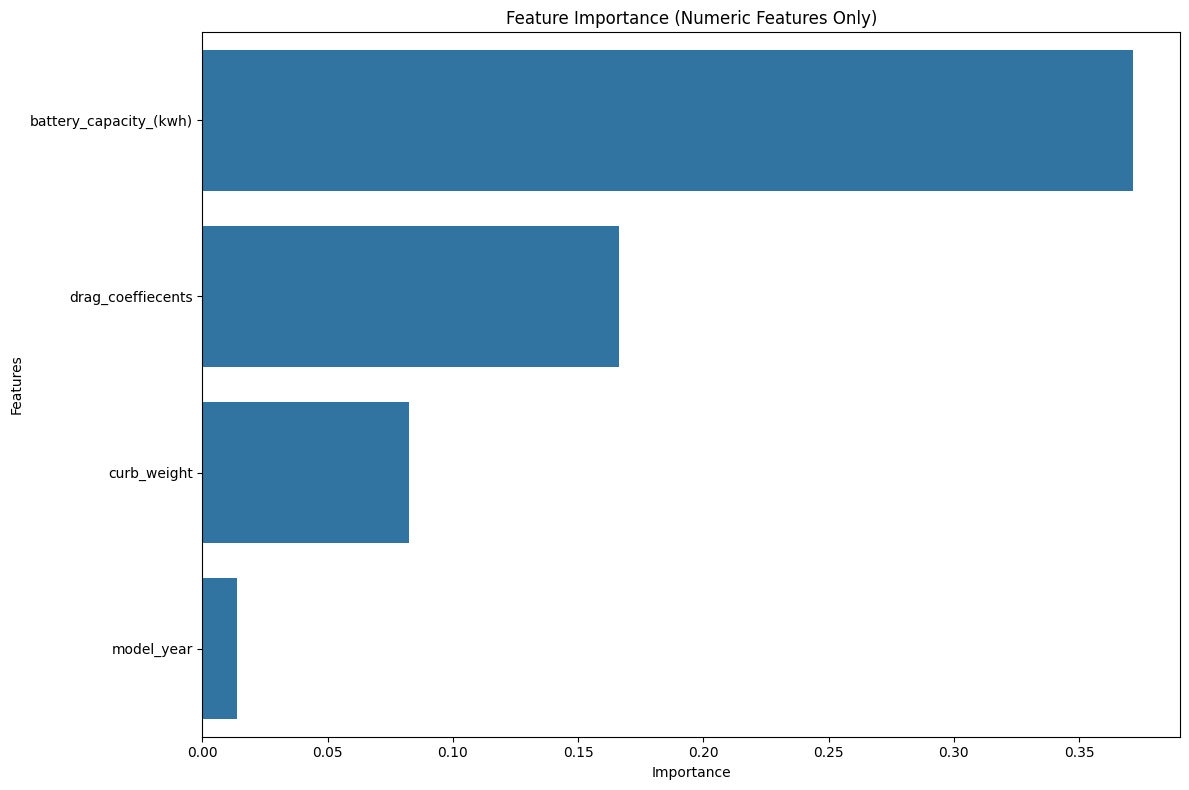

In [60]:
# Using Random forest with the best params 

# Define preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# Define the ensemble model with provided parameters
model = RandomForestRegressor(
    random_state=42,
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200
)

# Create the complete pipeline
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", model)
])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
start_time = time.time()
pipeline.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Optimized Mean Absolute Error: {mae}")
print(f"Optimized Mean Squared Error: {mse}")
print(f"Training Time: {training_time:.2f} seconds")

# Extract feature importances for numeric features only
final_model = pipeline.named_steps["model"]
feature_importances = final_model.feature_importances_

# Combine numeric features and their importance
importance_df = pd.DataFrame({
    "Feature": numeric_features,
    "Importance": feature_importances[:len(numeric_features)]
}).sort_values(by="Importance", ascending=False)

# Print feature importances
print("Feature Importances:")
print(importance_df)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title("Feature Importance (Numeric Features Only)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


### Results

After testing different models the esemble techniques (Random Forest) produced the best result in model training. 
Ensemble technique produced the lowest MSE and MAE so those would be recommended for this dataset.
The model also provides the feature importance as follows
1. Battery Capacity 0.37
2. Drag Coefficients 0.16
3. Curb Weight  0.08

While the training time of the Decision Tree is faster than the Ensemble model produces better results.

### Recommendation

I would recommend using ensemble model to predict the All Electric Range as it yields better results compared to the singular models. 